In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from scipy.stats import reciprocal, uniform
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [71]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

## Exploratory data analysis - EDA 

In [66]:
#skriver ut beskrivning om dataset
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [65]:
#detjaler för datasetet mnist
mnist.details

{'id': '554',
 'name': 'mnist_784',
 'version': '1',
 'description_version': '1',
 'format': 'ARFF',
 'creator': ['Yann LeCun', 'Corinna Cortes', 'Christopher J.C. Burges'],
 'upload_date': '2014-09-29T03:28:38',
 'language': 'English',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/52667/mnist_784.arff',
 'parquet_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'file_id': '52667',
 'default_target_attribute': 'class',
 'tag': ['AzurePilot',
  'OpenML-CC18',
  'OpenML100',
  'study_1',
  'study_123',
  'study_41',
  'study_99',
  'vision'],
 'visibility': 'public',
 'minio_url': 'http://openml1.win.tue.nl/dataset554/dataset_554.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:12:09',
 'md5_checksum': '0298d579eb1b86163de7723944c7e495'}

In [ ]:
X.describe()

In [3]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [69]:
#Check the frequency of each number #glöm inte att ändra as_frame=True för att koden ska funka
y.value_counts().sort_index()

0    6903
1    7877
2    6990
3    7141
4    6824
5    6313
6    6876
7    7293
8    6825
9    6958
Name: class, dtype: int64

/Users/farhana/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

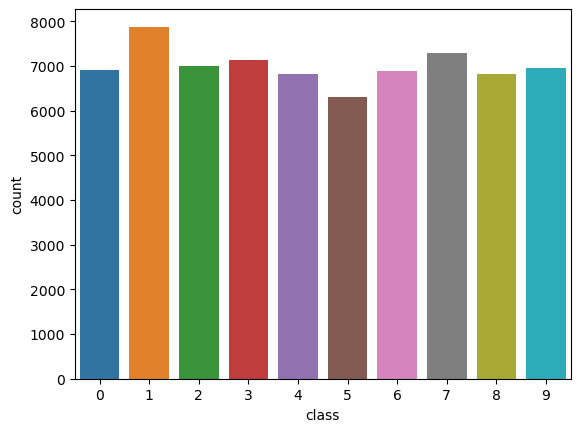

In [70]:
sns.countplot(y)

In [ ]:
#skriver ut namnen på datasetkolumnerna. The names of the dataset columns.
#print(mnist.feature_names)

In [ ]:
print("Number of classes:", len(np.unique(y)))

In [ ]:
print("shape of training data", X_train.shape)
print("shape of training labels", y_train.shape)
print("Shape of test data", X_test.shape)
print("shape of data", X.shape)
print("shape of labels", y.shape)

In [67]:
y.describe()

count    70000.000000
mean         4.452429
std          2.890195
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: class, dtype: float64

In [63]:
# urval av 5 observationer om hur datasetet ser ut 
X.sample(5)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
21310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
62971,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#kollar på första svaret som är 5. y är den rätta svaren, dvs de rätta svaren finns på y.
y[0]

In [ ]:
y[9]#kollar på den 9:de svaret som är en 4

In [ ]:
#kollar på shape för att förstå den. det är 5000rader och 784 kolumner, dvs en kolumn för varje pixle. 
print(X.shape)
print(y.shape)

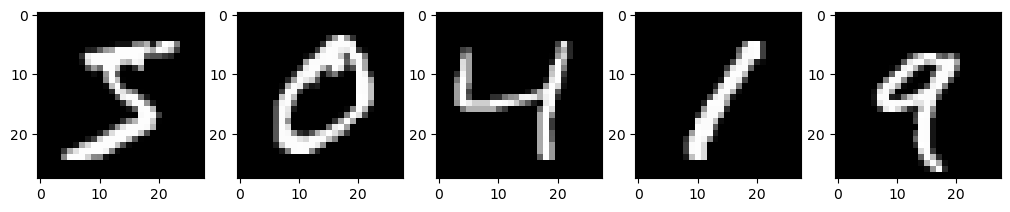

In [72]:
#Urval på hur handskrivna siffror ser ut. #glöm inte att ändra till as_frame till false. 
plt.figure(figsize=(15,4))
for index, (image, label) in enumerate(zip(mnist.data[0:7], 
                                           mnist.target[0:5])):
    plt.subplot(1, 6, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray);

## Modellera MNIST DATA

In [8]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:]
y_test = y[60000:]


In [9]:
# Standardizing data (skall tillmämpas vid SVM modell).
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

## SVM

In [10]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train, y_train)



/Users/farhana/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [11]:
y_pred = lin_clf.predict(X_train)
accuracy_score(y_train, y_pred)


0.8348666666666666

testar på testdatan för att se om den är overfittat

In [12]:
y_pred = lin_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8236

#### Testar att skalar datan. Detta ifall datapunkterna är längt ifrån varandra och därmed göra de närmare varandra och mer generaliserat. 
#### Scalning tilllämpas för att göra datapunkter generaliserade så att avstånden mellan de blir lägra. 


In [13]:
lin_clf = LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled, y_train)


/Users/farhana/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=42)

In [14]:
y_pred = lin_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

0.9214

testar på testdatan

In [15]:
y_pred = lin_clf.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.9121

## Logistic regression

In [24]:
logisticRegr = LogisticRegression(solver = 'lbfgs')


In [25]:
logisticRegr.fit(X_train, y_train)


/Users/farhana/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
score = logisticRegr.score(X_train, y_train)
print(score)

0.9339166666666666


In [32]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9255


## RandomizedSearch


In [33]:
svm_clf = SVC()

In [34]:
hyper_param_distribution = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
rnd_search_cv = RandomizedSearchCV(svm_clf, hyper_param_distribution, n_iter=10, verbose=2, cv=3)

In [35]:
rnd_search_cv.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ....C=5.583633856308697, gamma=0.016705254899260422; total time=45.7min
[CV] END ....C=5.583633856308697, gamma=0.016705254899260422; total time=41.5min
[CV] END ....C=5.583633856308697, gamma=0.016705254899260422; total time=38.0min
[CV] END ....C=4.091407627272911, gamma=0.030321113788259656; total time=55.8min
[CV] END ....C=4.091407627272911, gamma=0.030321113788259656; total time=54.6min
[CV] END ....C=4.091407627272911, gamma=0.030321113788259656; total time=55.1min
[CV] END .....C=6.408756335201328, gamma=0.07773916148008428; total time=68.3min
[CV] END .....C=6.408756335201328, gamma=0.07773916148008428; total time=68.5min
[CV] END .....C=6.408756335201328, gamma=0.07773916148008428; total time=68.9min
[CV] END ...C=2.5141900422352172, gamma=0.002346144603002349; total time= 6.7min
[CV] END ...C=2.5141900422352172, gamma=0.002346144603002349; total time= 6.7min
[CV] END ...C=2.5141900422352172, gamma=0.002346

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8ab1c5c160>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f8ab1dc1370>},
                   verbose=2)

In [36]:
y_pred_rnd = rnd_search_cv.predict(X_train_scaled)
accuracy_score(y_train, y_pred_rnd)

0.9993833333333333

#### Testar på testdata

In [39]:
y_pred_rnd = rnd_search_cv.predict(X_test_scaled)
accuracy_score(y_test, y_pred_rnd)

0.9709

## Randomforest???

In [43]:
rf_classifier = RandomForestClassifier(n_estimators=100)

In [44]:
# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
# prediktera labels för test set
predicted = rf_classifier.predict(X_test)

In [50]:
# Calculate the accuracy score
accuracy = metrics.accuracy_score(y_test, predicted)
print(accuracy)

0.9695
